In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import cv2
from PIL import Image,ImageOps
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import random as rnd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/projetVision'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (23).jpg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (20).png
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (221).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (331).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (25).png
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (385).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (2).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (381).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (349).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (248).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (228).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (329).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (325).jpeg
/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bi

/content/drive/MyDrive/Colab Notebooks/projetVision/Bike
/content/drive/MyDrive/Colab Notebooks/projetVision/Car


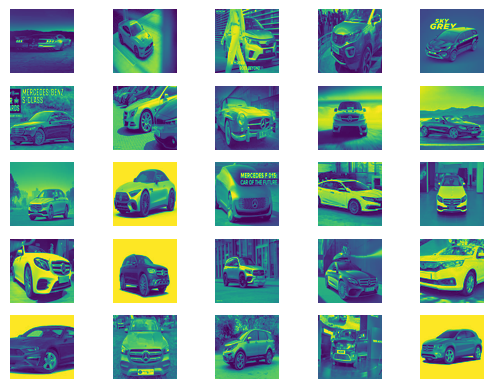

In [6]:
# creer une liste de dicitionnaire contient chacun le path et  un tableau des images
folder_paths = [{"path":"/content/drive/MyDrive/Colab Notebooks/projetVision/Bike","arr":[]},
                {"path":"/content/drive/MyDrive/Colab Notebooks/projetVision/Car","arr":[]}]
# The image load process
for folder in folder_paths:
    print(folder["path"])
    for cnt,filename in enumerate(os.listdir(folder["path"])):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):

            img = ImageOps.grayscale(Image.open(os.path.join(folder["path"],filename)))
            img = img.resize((64,64))
            if cnt < 25:
                plt.subplot(5,5,cnt+1)
                plt.imshow(img)
                plt.axis("off")
                folder["arr"].append(np.array(img))
    folder["arr"] = np.array(folder["arr"])

Train_O: (25, 64, 64)
Train_R: (25, 64, 64)

X_train: (40, 64, 64)
y_train: (40,)
X_train_flatten: (4096, 40)



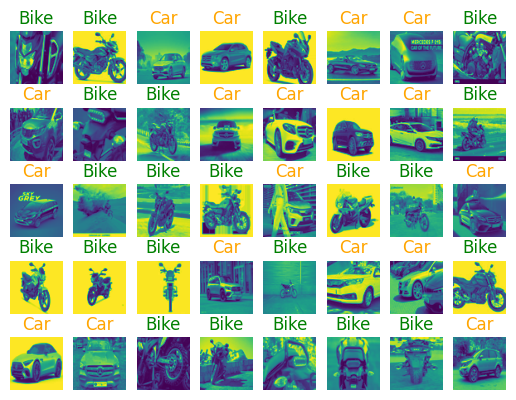

In [15]:
nbechantillons=1900

# Define the number of samples to use from each class
titles={0:"Bike",1:"Car"}

Train_O = folder_paths[0]["arr"][0:1900]
Train_R = folder_paths[1]["arr"][0:1900]

print("""Train_O: {}
Train_R: {}
""".format(Train_O.shape,Train_R.shape))
X = np.concatenate((Train_O,Train_R),axis=0)

# Create a numpy array of labels (0 for bikes, 1 for cars)
y = np.concatenate((np.zeros(Train_O.shape[0]),np.ones(Train_R.shape[0])),axis=0)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2]).T
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2]).T

def lossFunction(pred,real):
    return -real*np.log(pred)-(1-real)*np.log(1-pred)

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
print("""X_train: {}
y_train: {}
X_train_flatten: {}
""".format(X_train.shape,Y_train.shape,X_train_flatten.shape))


#afficher aleatoirement 40 images differents
indexes = []
for i in range(40):
    index = rnd.randint(0, X_train.shape[0] - 1)
    while index in indexes:
        index = rnd.randint(0, X_train.shape[0] - 1)
    indexes.append(index)

    plt.subplot(5, 8, i + 1)
    plt.imshow(X_train[index])
    plt.axis("off")
    plt.title(titles[int(Y_train[index])], color="green" if Y_train[index] == 0 else "orange")


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Redéfinir les données en les aplatissant
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Définition du modèle
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(4096,)),  # Adaptation de la forme d'entrée
    layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train_flatten, Y_train, epochs=10, batch_size=32, validation_split=0.1)

model.save("/content/drive/MyDrive/Colab Notebooks/projetVision/modele.h5")
# Évaluation du modèle sur les données de test
#test_loss, test_accuracy = model.evaluate(X_test_flatten, Y_test)
#print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
2/2 [==============================] - 1s 225ms/step - loss: 298.0660 - accuracy: 0.4722 - val_loss: 152.3915 - val_accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 0s 61ms/step - loss: 792.5961 - accuracy: 0.4167 - val_loss: 174.6511 - val_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 66ms/step - loss: 136.8431 - accuracy: 0.5833 - val_loss: 145.5143 - val_accuracy: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 53ms/step - loss: 105.9527 - accuracy: 0.6111 - val_loss: 1.6359e-07 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 48ms/step - loss: 15.6051 - accuracy: 0.7778 - val_loss: 8.3891 - val_accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 0s 66ms/step - loss: 38.7697 - accuracy: 0.5278 - val_loss: 17.3984 - val_accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 61ms/step - loss: 16.5973 - accuracy: 0.7778 - val_loss: 12.4379 - val_accuracy: 0.7500
Epo

In [20]:
# Chargement du modèle
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Colab Notebooks/projetVision/modele.h5")
# Charger et prétraiter une nouvelle image
new_image_path = "/content/drive/MyDrive/Colab Notebooks/projetVision/Bike/Bike (48).jpeg"
new_img = cv2.imread(new_image_path)
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
new_img = cv2.resize(new_img, (64, 64))  # Redimensionner l'image

# Aplatir l'image
new_img_flatten = new_img.reshape(1, -1)
# Faire la prédiction
prediction = model.predict(new_img_flatten)

# Afficher le résultat
if prediction[0] < 0.5:
    print("C'est un vélo !")
else:
    print("C'est une voiture !")




1/1 [==============================] - 0s 97ms/step
C'est un vélo !


In [ ]:
def compute_prediction_score(y_pred,y_real):
    return np.array(y_pred == y_real.T).sum() / y_pred.shape[1]

def compute_predictions_ANN(X, parameters):
    A1=np.tanh((np.dot(parameters["weight1"],X)+parameters["bias1"]))
    A2 = sigmoid(np.dot(parameters["weight2"],A1))+parameters["bias2"]
    return np.multiply([A2 > 0.5],1)[0] # make it binary due to treshold 0.5

def predict_ANN(x_train,y_train,x_test,y_test,parameters):
    y_pred_test = compute_predictions_ANN(x_test,parameters)
    prediction_score_test = compute_prediction_score(y_pred_test,y_test)
    y_pred_train = compute_predictions_ANN(x_train,parameters)
    prediction_score_train = compute_prediction_score(y_pred_train,y_train)

2/2 [==============================] - 0s 7ms/step
Test Score:  0.8
Train Score:  0.9


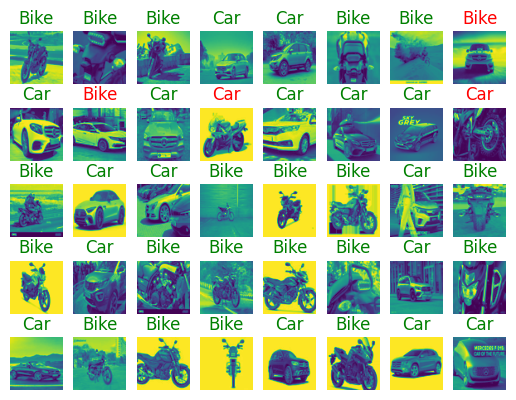

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

def predict_keras_model(model_path, x_train, y_train, x_test, y_test):
    # Chargement du modèle
    model = load_model(model_path)

    # Prédiction sur les données de test
    y_pred_test_prob = model.predict(x_test)
    y_pred_test = (y_pred_test_prob > 0.5).astype(int).flatten()

    # Calcul du score de prédiction sur les données de test
    prediction_score_test = np.mean(y_pred_test == y_test)

    # Prédiction sur les données d'entraînement
    y_pred_train_prob = model.predict(x_train)
    y_pred_train = (y_pred_train_prob > 0.5).astype(int).flatten()

    # Calcul du score de prédiction sur les données d'entraînement
    prediction_score_train = np.mean(y_pred_train == y_train)

    # Affichage des résultats pour les 40 premières images de test
    for counter, index in enumerate(np.random.choice(len(x_train), min(40, len(x_train)), replace=False)):

        plt.subplot(5, 8, counter + 1)

        # Redimensionner l'image avant l'affichage
        image = x_train[index].reshape(64, 64)
        plt.imshow(image)  # Assurez-vous d'utiliser la bonne cmap pour les images en niveaux de gris
        plt.axis("off")

        if y_pred_train[index] == y_train[index]:
            color = "green"
        else:
            color = "red"
        plt.title(titles[y_pred_train[index]], color=color)

    print("Test Score: ", prediction_score_test)
    print("Train Score: ", prediction_score_train)

# Utilisation de la fonction avec le modèle Keras
predict_keras_model("/content/drive/MyDrive/Colab Notebooks/projetVision/modele.h5", X_train_flatten, Y_train, X_test_flatten, Y_test)
